# <center>Assignment : Simple Linear Regression</center>

__Problem Statement__<br>

1) Delivery_time -> Predict delivery time using sorting time <br>
2) Salary_hike -> Build a prediction model for Salary_hike<br>

__<hr style="border:0.5px solid green">__<br>

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

 ##  I. Delivery_time -> Predict delivery time using sorting time

In [1]:
#importing llibraries to read data
import pandas as pd

data_del_time=pd.read_csv("delivery_time.csv")

#### Data explore to understand basics of data

In [2]:
data_del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##### data set has two columns Delivery time and sorting time, we are supposed to predict delivey time based on sorting time

In [3]:
# number of rows and columns
data_del_time.shape

(21, 2)

##### data set has 21 rows and 2 columns

In [4]:
# getting basic info on data

In [5]:
data_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


##### there are no null values, data type for Delivery time is float and for sorting is integer

In [6]:
# getting basics statistical information on data set
data_del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


##### statistical information we get:<br>
__for Delivery Time__<br>
- 1st quartile: 13.5
- 3rd quartile: 19.7
- Min value: 8.0
- Max value: 29.00
- IQR: 19.7-13.5 = 6.2
- mean: 16.79
- std: 5.07
<br>

__for Sorting Time__<br>
- 1st quartile: 4
- 3rd quartile: 8
- Min value: 2
- Max value: 10
- IQR: 8-4 =4
- mean:6.19
- std: 5.54

In [7]:
# changing column names Delivery time to Delivery_time and Sorting time to Sorting_time
data_del_time.rename(columns={'Delivery Time':"Delivery_Time","Sorting Time":"Sorting_Time"}, inplace=True)
data_del_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0, 0.5, 'Delivery Time')

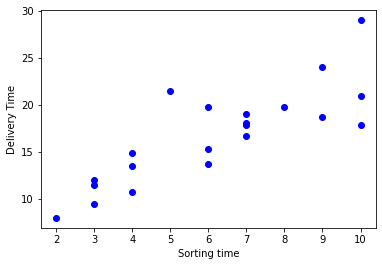

In [8]:
# creating scatter plot to see if there is any linear relation between Sorting time and Delivery time
#importing matplot library
import matplotlib.pyplot as plt

plt.plot(data_del_time['Sorting_Time'], data_del_time['Delivery_Time'], "bo")
plt.xlabel("Sorting time")
plt.ylabel("Delivery Time")

#### there is strong positive relation between between Sorting_Time and Delivery_Time

In [9]:
#check correlation between Sorting_Time and Delivery_Time
data_del_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


#### the correlation is + 0.826 i.e. there strong correlation of 82.6% between Sorting_Time and Delivery_Time

### Check more on data using distirbution plot from seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

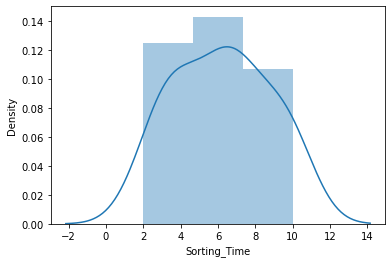

In [10]:
import seaborn as sns

sns.distplot(data_del_time['Sorting_Time'])

#### for sorting time: we notice that 50% of data is between 4 and 8 and has no tails.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

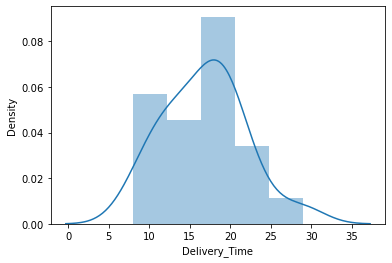

In [11]:
sns.distplot(data_del_time['Delivery_Time'])

#### for sorting time: we notice that 50% of data is between 10 and 20 and as per statis information ealier it should be beteen 13.5 and 19.7

__Fitting a Linear Regression Model__

In [12]:
import statsmodels.formula.api as smf
deliver_time_model = smf.ols("Delivery_Time~Sorting_Time",data = data_del_time).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

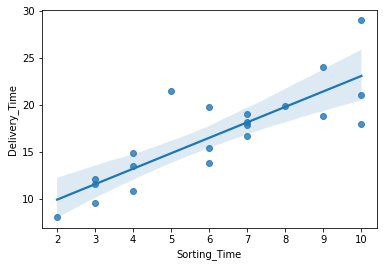

In [13]:
#creating regression plot

sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data_del_time)

#### regression plot showing positive regression between Sorting_Time and Delivery_Time

In [14]:
#get all results of Simple linear fit
deliver_time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.98e-06
Time:                        00:33:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 6.5827<br>
__beta1__ is 6.5827<br>
__R-Squared__ is 0.682 indicates __model is 68.2% accurate__<br>
__Degree of freem for errors(DFResidual)__ is 19<br>
__degree of freedom for modelel__ is 1<br>
__P value__ is 0.00 (is less than 0.05) meaning this __is siginifcant parameter__ for Sorting_Time

# Predict for new data point

In [15]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([7,12])

In [16]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [17]:
data_pred.head()

,Sorting_Time
0,7
1,12


In [18]:
deliver_time_model.predict(data_pred)

0    18.125873
1    26.370973
dtype: float64

#### Results:<br>
1. for __Sorting Time : 7__, the __Delivery Time: 18.1__
2. for __Sorting Time : 12__,the __Delivery Time: 26.3__

 ## II Salary_hike -> Build a prediction model for Salary_hike

In [19]:
# reading salaries data
data_salary=pd.read_csv("Salary_Data.csv")

#### Data explore to understand basics of data

In [20]:
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Dataset has two columns YearsExperience and Salary, we need to build simple liner model to predict salary hike based on yearsExperience

In [21]:
# data shape to check number of rows and coulms
data_salary.shape

(30, 2)

#### dataset has 30 rows and 2 columns

In [22]:
# getting basic info on data
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### there are no null values and both columns have data types as float

In [23]:
# getting statistical info on data
data_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### statistical information we get:<br>
__for YearsExperience__<br>
- 1st quartile: 3.2
- 3rd quartile: 7.7
- Min value: 1.1
- Max value: 10.5
- mean: 5.31
- std: 2.84
<br>

__for Salary__<br>
- 1st quartile: 56720.75
- 3rd quartile: 100544.75
- Min value: 37731.00
- Max value: 122391.00
- mean:76003.00
- std: 27414.43

Text(0, 0.5, 'Salary')

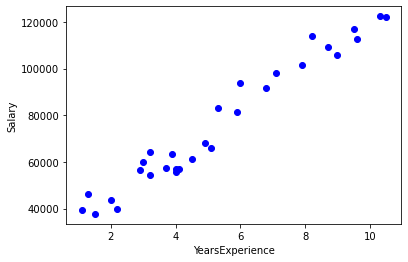

In [24]:
# creating scatter plot to see if there is any linear relation between Sorting time and Delivery time
#importing matplot library
import matplotlib.pyplot as plt

plt.plot(data_salary['YearsExperience'], data_salary['Salary'], "bo")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

#### The scatter plot shows there is +VE linear relation between yearsEperience and Salary i.e. with increase in experience salry increases. Thus its correlation expected to be positive

In [25]:
# check correlation
data_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Correlation between yearsExperience and Salary is +0.97.8 i.e. 97.8%, a strong positive correlation between the fields.

### Check more on data using distirbution plot from seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

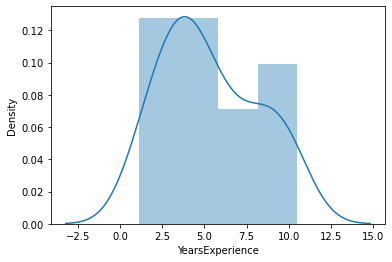

In [26]:
sns.distplot(data_salary['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

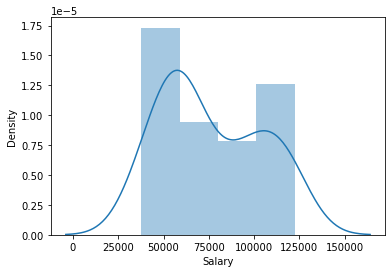

In [27]:
sns.distplot(data_salary['Salary'])

__Fitting a Linear Regression Model__

In [28]:
salary_hike_model = smf.ols("Salary~YearsExperience",data = data_salary).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

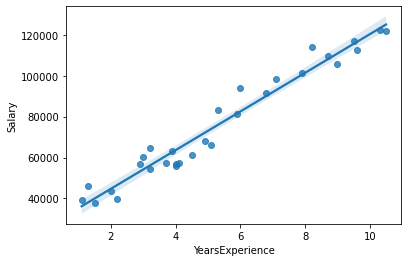

In [29]:
#creating regression plot

sns.regplot(x="YearsExperience", y="Salary", data=data_salary)

#### The Regression plot shows there is strong +ve linear relation between yearsEperience and Salary i.e. with increase in experience salry increases. Thus its correlation expected to be positive

In [30]:
#get all results of Simple linear fit
salary_hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.14e-20
Time:                        00:33:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Results Summary__<br>
__beta0__  is 2579<br>
__beta1__ is 9449.96<br>
__R-Squared__ is 0.957 indicates __model is 95.7% accurate__<br>
__Degree of freem for errors(DFResidual)__ is 28<br>
__degree of freedom for model__ is 1<br>
__P value__ is 0.00 (is less than 0.05) meaning this __is siginifcant parameter__ for Sorting_Time

# Predict for new data point

In [31]:
#Predict for 200 and 300 daily circulation
salary_predict_data=pd.Series([5.5, 20])

In [32]:
salary_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [33]:
salary_pred.head()

,YearsExperience
0,7
1,12


In [34]:
salary_hike_model.predict(salary_pred)

0     91941.936449
1    139191.748056
dtype: float64

#### Results:<br>
1. for __Sorting Time : 5.5__, the __Delivery Time: 77766.99__
2. for __Sorting Time : 20.0__,the __Delivery Time: 214791.45__